# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | aykhal
Processing Record 4 of Set 1 | vernon
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | paita
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 10 of Set 1 | puerto deseado
Processing Record 11 of Set 1 | dauphin
Processing Record 12 of Set 1 | plaza huincul
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | nemuro
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | kabinda
Processing Record 17 of Set 1 | mazar-e sharif
Processing Record 18 of Set 1 | auki
Processing Record 19 of Set 1 | hoxtolgay
City not found. Skipping...
Processing Record 20 of Set 1 | brookings
Processing Record 21 of Set 1 | ramotswa
Processing 

Processing Record 38 of Set 4 | saint-philippe
Processing Record 39 of Set 4 | richlands
Processing Record 40 of Set 4 | port moresby
Processing Record 41 of Set 4 | sweetwater
Processing Record 42 of Set 4 | san jose
Processing Record 43 of Set 4 | sarandi del yi
Processing Record 44 of Set 4 | port alfred
Processing Record 45 of Set 4 | buulobarde
Processing Record 46 of Set 4 | puerto ayora
Processing Record 47 of Set 4 | pali
Processing Record 48 of Set 4 | porbandar
Processing Record 49 of Set 4 | punta arenas
Processing Record 0 of Set 5 | mar del plata
Processing Record 1 of Set 5 | thompson
Processing Record 2 of Set 5 | isle of lewis
City not found. Skipping...
Processing Record 3 of Set 5 | roma
Processing Record 4 of Set 5 | phai sali
Processing Record 5 of Set 5 | chachersk
Processing Record 6 of Set 5 | nguigmi
Processing Record 7 of Set 5 | nykarleby
Processing Record 8 of Set 5 | tarawa
Processing Record 9 of Set 5 | lihue
Processing Record 10 of Set 5 | kodiak
Processin

Processing Record 28 of Set 8 | nadym
Processing Record 29 of Set 8 | shitanjing
Processing Record 30 of Set 8 | kavieng
Processing Record 31 of Set 8 | zyryanovsk
Processing Record 32 of Set 8 | alausi
Processing Record 33 of Set 8 | maceio
Processing Record 34 of Set 8 | zuwarah
Processing Record 35 of Set 8 | sona
Processing Record 36 of Set 8 | el alto
Processing Record 37 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | winona
Processing Record 40 of Set 8 | kargil
Processing Record 41 of Set 8 | constitucion
Processing Record 42 of Set 8 | karakulino
Processing Record 43 of Set 8 | coahuayana de hidalgo
Processing Record 44 of Set 8 | saltillo
Processing Record 45 of Set 8 | al mindak
Processing Record 46 of Set 8 | seminole
Processing Record 47 of Set 8 | vila velha
Processing Record 48 of Set 8 | novyy urengoy
Processing Record 49 of Set 8 | jamaame
Processing Record 0 of Set 9 | khabary
Pr

Processing Record 16 of Set 12 | carcarana
Processing Record 17 of Set 12 | baker city
Processing Record 18 of Set 12 | bubaque
Processing Record 19 of Set 12 | bay harbor
Processing Record 20 of Set 12 | lerwick
Processing Record 21 of Set 12 | inari
Processing Record 22 of Set 12 | arua
Processing Record 23 of Set 12 | leca da palmeira
Processing Record 24 of Set 12 | nantucket
Processing Record 25 of Set 12 | ammi moussa
Processing Record 26 of Set 12 | ventnor
Processing Record 27 of Set 12 | taroa
Processing Record 28 of Set 12 | galliano
Processing Record 29 of Set 12 | albertina
Processing Record 30 of Set 12 | la ronge
Processing Record 31 of Set 12 | mukah
City not found. Skipping...
Processing Record 32 of Set 12 | steamboat springs
Processing Record 33 of Set 12 | magistral'nyy
Processing Record 34 of Set 12 | oranjestad
Processing Record 35 of Set 12 | kununurra
Processing Record 36 of Set 12 | darwin
Processing Record 37 of Set 12 | chotila
Processing Record 38 of Set 12 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,2.79,82,100,2.68,NZ,1718144477
1,iqaluit,63.7506,-68.5145,1.85,87,75,1.54,CA,1718144345
2,aykhal,66.0000,111.5000,17.06,48,77,2.12,RU,1718144480
3,vernon,50.2581,-119.2691,27.39,20,75,3.09,CA,1718144481
4,grytviken,-54.2811,-36.5092,-9.57,75,17,5.86,GS,1718144483


In [6]:
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,2.79,82,100,2.68,NZ,2024-06-11
1,iqaluit,63.7506,-68.5145,1.85,87,75,1.54,CA,2024-06-11
2,aykhal,66.0000,111.5000,17.06,48,77,2.12,RU,2024-06-11
3,vernon,50.2581,-119.2691,27.39,20,75,3.09,CA,2024-06-11
4,grytviken,-54.2811,-36.5092,-9.57,75,17,5.86,GS,2024-06-11


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/users/fuent/Downloads/Starter_Code (14) - Copy/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df.to_csv("C:/users/fuent/Downloads/Starter_Code (14) - Copy/Starter_Code/output_data/cities.csv", index_label="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,2.79,82,100,2.68,NZ,2024-06-11
1,iqaluit,63.7506,-68.5145,1.85,87,75,1.54,CA,2024-06-11
2,aykhal,66.0000,111.5000,17.06,48,77,2.12,RU,2024-06-11
3,vernon,50.2581,-119.2691,27.39,20,75,3.09,CA,2024-06-11
4,grytviken,-54.2811,-36.5092,-9.57,75,17,5.86,GS,2024-06-11


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

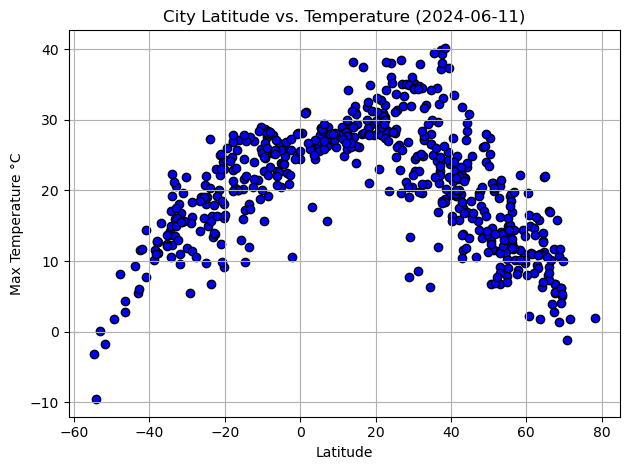

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', facecolors='b', edgecolors='k')

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature °C")
date=city_data_df['Date'].min()
plt.title(f"City Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("C:/users/fuent/Downloads/Starter_Code (14) - Copy/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

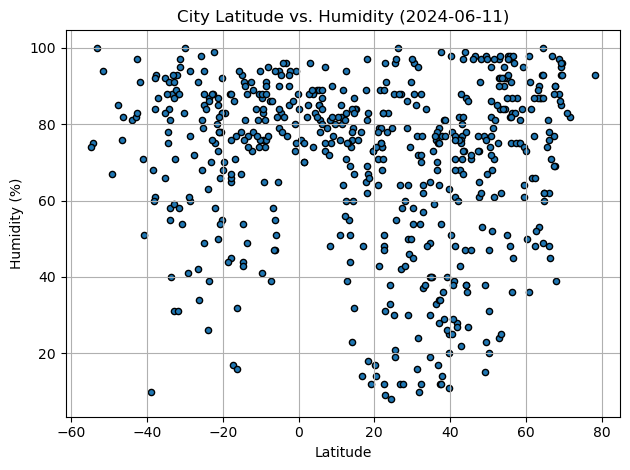

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("C:/users/fuent/Downloads/Starter_Code (14) - Copy/Starter_Code/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

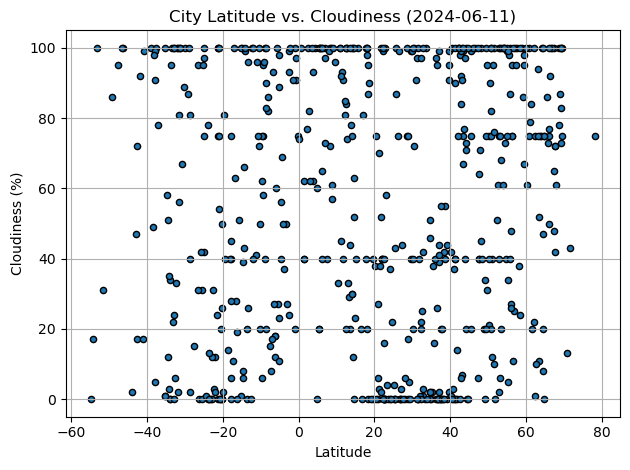

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("C:/users/fuent/Downloads/Starter_Code (14) - Copy/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

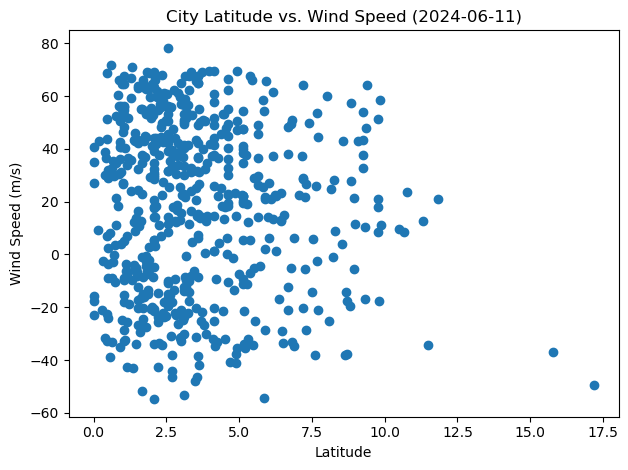

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.tight_layout()

# Save the figure
plt.savefig("C:/users/fuent/Downloads/Starter_Code (14) - Copy/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regress(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="X", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,iqaluit,63.7506,-68.5145,1.85,87,75,1.54,CA,2024-06-11
2,aykhal,66.0000,111.5000,17.06,48,77,2.12,RU,2024-06-11
3,vernon,50.2581,-119.2691,27.39,20,75,3.09,CA,2024-06-11
6,bethel,41.3712,-73.4140,22.74,61,40,3.09,US,2024-06-11
9,dauphin,51.1494,-100.0502,21.08,52,40,9.77,CA,2024-06-11


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,2.79,82,100,2.68,NZ,2024-06-11
4,grytviken,-54.2811,-36.5092,-9.57,75,17,5.86,GS,2024-06-11
5,paita,-5.0892,-81.1144,20.45,79,23,6.78,PE,2024-06-11
7,waitangi,-43.9535,-176.5597,9.34,81,2,2.68,NZ,2024-06-11
8,puerto deseado,-47.7503,-65.8938,8.23,85,95,3.49,AR,2024-06-11


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7408199617370889


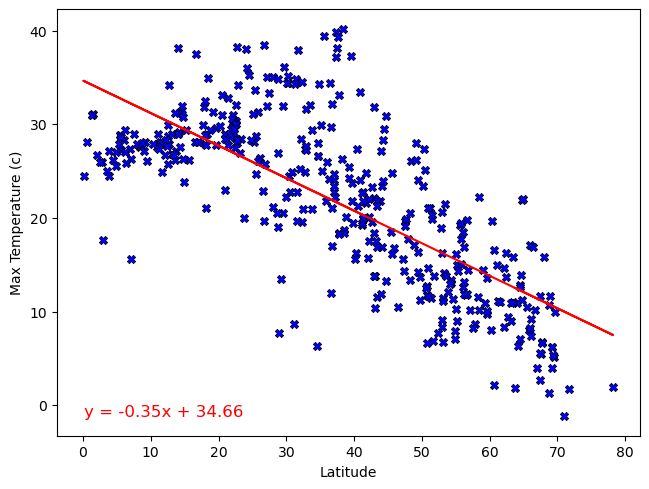

In [18]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

The r-value is: 0.7842605291468684


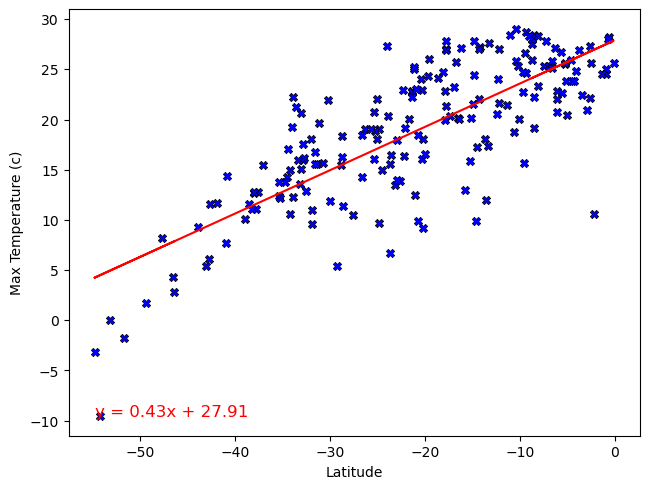

In [19]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Strong correlation between temp and latitude that affects the hemispheres differently. The north has a negative correlation of -0.7408199617370889, but in the south the correlation is positively flipped to 0.7842605291468684.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09447113200711273


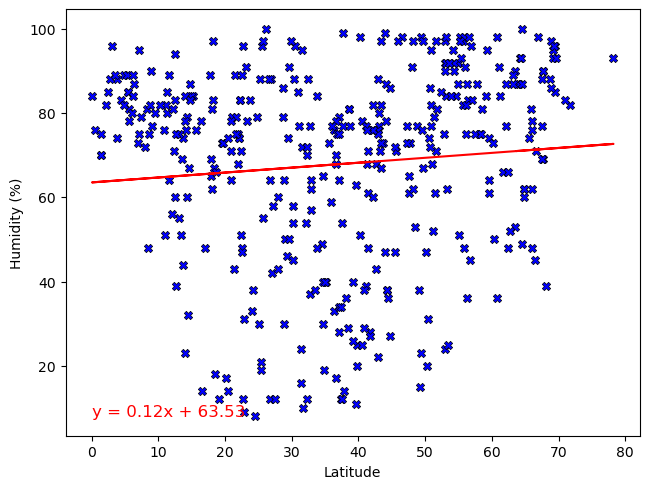

In [20]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: 0.04406790198666274


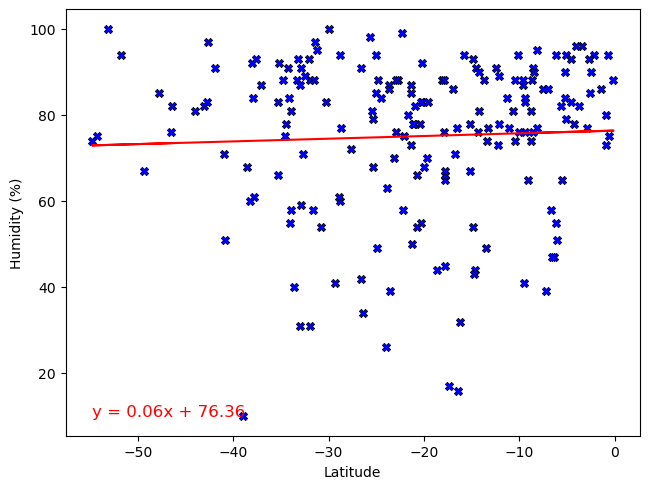

In [21]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is somewhat of a relationship between latitude and humidity. Both hemispheres have positive correlation coefficient, but the north 0.09447113200711273 is higher. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08301684277018825


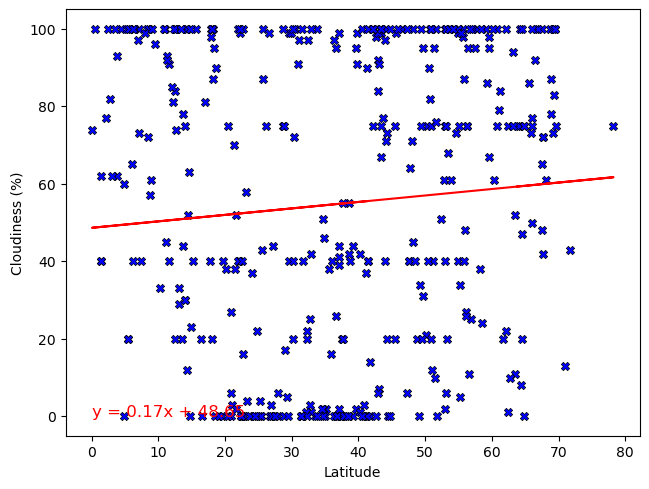

In [22]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: 0.0209111170318998


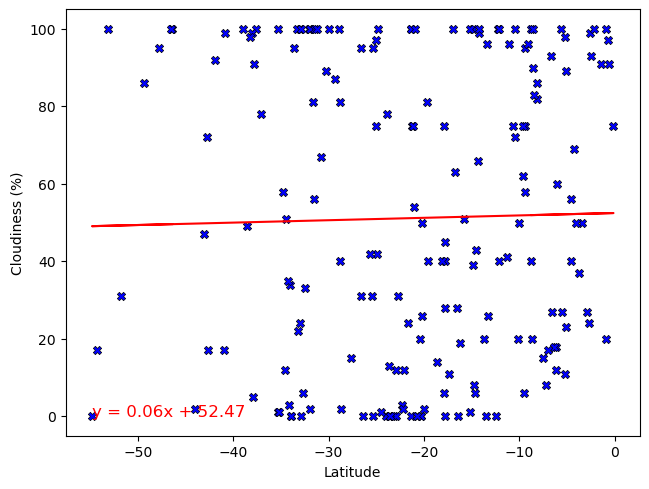

In [23]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The scatter points show that the data is spread all around to show any reliable correlation. Both hemispheres have positive correlations. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.18064120280634838


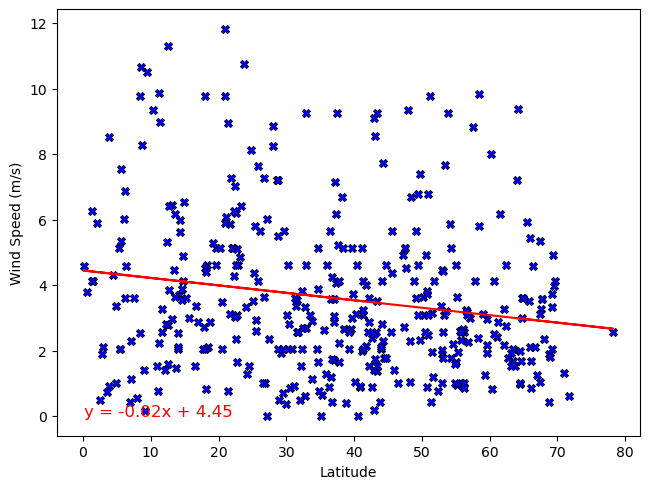

In [24]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.17553880152964343


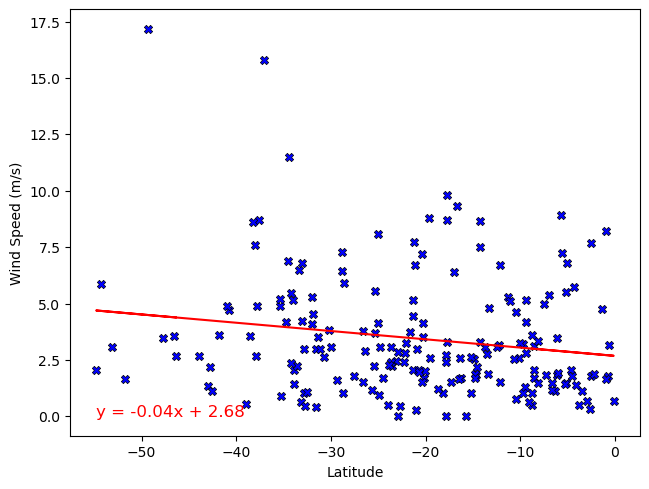

In [25]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
No relationship between latitude and wind speed. The two hemisphere’s correlation coefficient nearly mirror each other negatively. 